In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

from src.finite import *
from src.utils import *

## Midly overparamerized regime

In [19]:
target = 'one-neuron'
n = 200
m = 30
d = 19

nn = Train(m, n, d, target=target, save_aB=True)
nn.run(nepochs=50000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 3.6e-01
2500-th iter, loss: 1.1e-02
5000-th iter, loss: 1.8e-03
7500-th iter, loss: 4.4e-04
10000-th iter, loss: 1.3e-04
12500-th iter, loss: 4.2e-05
15000-th iter, loss: 1.4e-05


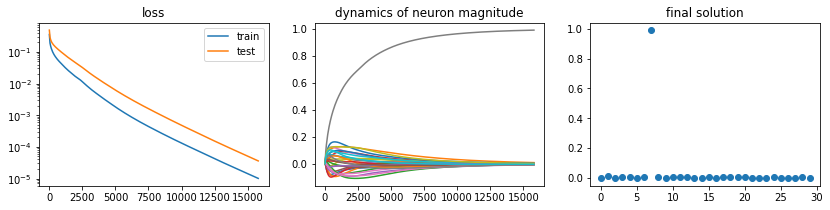

In [20]:
plot_dynamics(nn)

## Highly overparameterized regime

In [21]:
target = 'one-neuron'
n = 200
m = 300
d = 19

nn = Train(m, n, d, target=target, save_aB=True)
nn.run(nepochs=50000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 4.8e-01
2500-th iter, loss: 4.2e-03
5000-th iter, loss: 1.6e-03
7500-th iter, loss: 7.4e-04
10000-th iter, loss: 3.9e-04
12500-th iter, loss: 2.2e-04
15000-th iter, loss: 1.3e-04
17500-th iter, loss: 7.7e-05
20000-th iter, loss: 4.7e-05
22500-th iter, loss: 3.0e-05
25000-th iter, loss: 1.9e-05
27500-th iter, loss: 1.2e-05


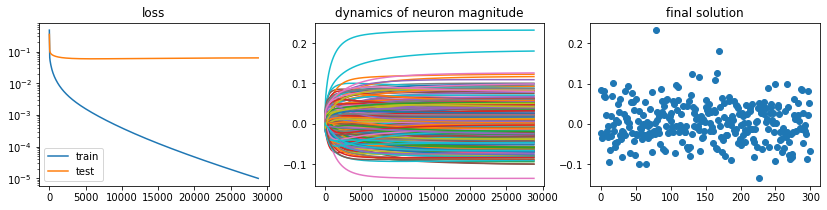

In [22]:
plot_dynamics(nn)

----
## Comparison with mean-field scaling

In [23]:
target = 'one-neuron'
n = 200
m = 300
d = 19

nn_mf = Train(m, n, d, mf=True, target=target, save_aB=True)
nn_mf.run(nepochs=50000, learning_rate=5e-3*m, TOL=1e-5, plot_epoch=2500, check_epoch=50)

0-th iter, loss: 4.9e-01
2500-th iter, loss: 2.1e-03
5000-th iter, loss: 5.5e-04
7500-th iter, loss: 3.1e-04
10000-th iter, loss: 2.1e-04
12500-th iter, loss: 1.5e-04
15000-th iter, loss: 1.2e-04
17500-th iter, loss: 9.2e-05
20000-th iter, loss: 7.5e-05
22500-th iter, loss: 6.2e-05
25000-th iter, loss: 5.2e-05
27500-th iter, loss: 4.4e-05
30000-th iter, loss: 3.8e-05
32500-th iter, loss: 3.3e-05
35000-th iter, loss: 2.9e-05
37500-th iter, loss: 2.6e-05
40000-th iter, loss: 2.3e-05
42500-th iter, loss: 2.1e-05
45000-th iter, loss: 1.9e-05
47500-th iter, loss: 1.7e-05


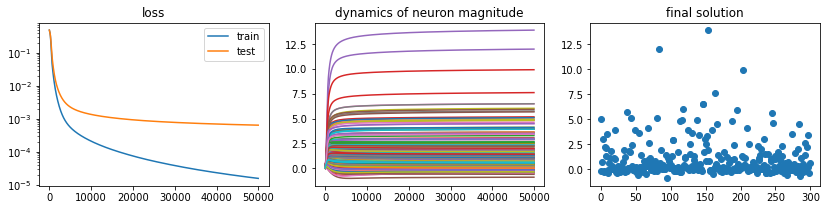

In [24]:
plot_dynamics(nn_mf)

- In the following, we visualize how the features move for two scaling.

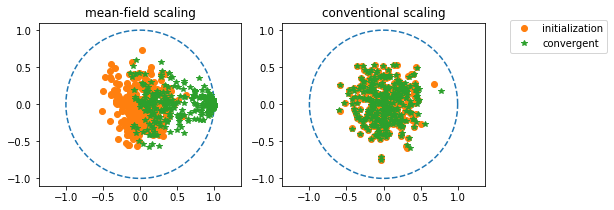

In [37]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
angle = np.linspace(0, np.pi*2, 1000)
x,y = np.cos(angle), np.sin(angle)

plt.plot(x,y,'--')
plt.axis('equal')

B_r = torch.tensor(nn_mf.B_r)
B_r /= B_r.norm(dim=2, keepdim=True)

plt.plot(B_r[0,:,0], B_r[0,:,1],'o')
plt.plot(B_r[-1,:,0], B_r[-1,:,1],'*')
plt.title('mean-field scaling')

#-----------------------------------------
plt.subplot(1,2,2)
angle = np.linspace(0, np.pi*2, 1000)
x,y = np.cos(angle), np.sin(angle)

plt.plot(x,y,'--')
plt.axis('equal')

B_r = torch.tensor(nn.B_r)
B_r /= B_r.norm(dim=2, keepdim=True)

plt.plot(B_r[0,:,0], B_r[0,:,1],'o', label='initialization')
plt.plot(B_r[-1,:,0], B_r[-1,:,1],'*', label='convergent')
plt.title('conventional scaling')
plt.legend(bbox_to_anchor=(1.1, 1.05))